In [16]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
df = pd.read_csv('monthly-milk-production-pounds-p.csv')

In [19]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [20]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [21]:
df.columns = ['Month', 'Milk in pounds per cow']

In [22]:
df.head()

,Month,Milk in pounds per cow
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [23]:
df.drop(168,axis = 0,inplace = True)

In [24]:
df['Month'] = pd.to_datetime(df['Month'])

In [25]:
df['Month']

0     1962-01-01
1     1962-02-01
2     1962-03-01
3     1962-04-01
4     1962-05-01
5     1962-06-01
6     1962-07-01
7     1962-08-01
8     1962-09-01
9     1962-10-01
10    1962-11-01
11    1962-12-01
12    1963-01-01
13    1963-02-01
14    1963-03-01
15    1963-04-01
16    1963-05-01
17    1963-06-01
18    1963-07-01
19    1963-08-01
20    1963-09-01
21    1963-10-01
22    1963-11-01
23    1963-12-01
24    1964-01-01
25    1964-02-01
26    1964-03-01
27    1964-04-01
28    1964-05-01
29    1964-06-01
         ...    
138   1973-07-01
139   1973-08-01
140   1973-09-01
141   1973-10-01
142   1973-11-01
143   1973-12-01
144   1974-01-01
145   1974-02-01
146   1974-03-01
147   1974-04-01
148   1974-05-01
149   1974-06-01
150   1974-07-01
151   1974-08-01
152   1974-09-01
153   1974-10-01
154   1974-11-01
155   1974-12-01
156   1975-01-01
157   1975-02-01
158   1975-03-01
159   1975-04-01
160   1975-05-01
161   1975-06-01
162   1975-07-01
163   1975-08-01
164   1975-09-01
165   1975-10-

In [26]:
df.set_index('Month',inplace=True)

In [27]:
df

,Milk in pounds per cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0
1962-06-01,697.0
1962-07-01,640.0
1962-08-01,599.0
1962-09-01,568.0


In [28]:
df.head()

,Milk in pounds per cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [29]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Milk in pounds per cow,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


In [30]:
df.index

DatetimeIndex(['1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01',
               ...
               '1975-03-01', '1975-04-01', '1975-05-01', '1975-06-01',
               '1975-07-01', '1975-08-01', '1975-09-01', '1975-10-01',
               '1975-11-01', '1975-12-01'],
              dtype='datetime64[ns]', name='Month', length=168, freq=None)

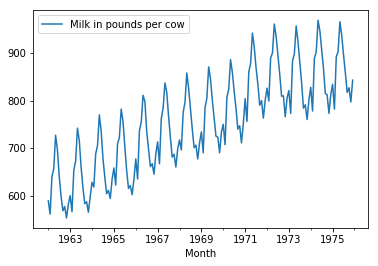

In [31]:
df.plot()

In [32]:
timeseries = df['Milk in pounds per cow']

In [33]:
type(timeseries)

pandas.core.series.Series

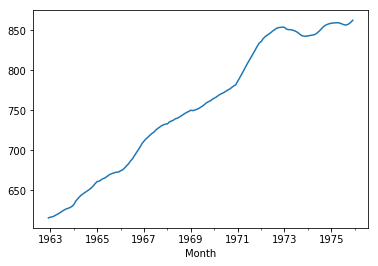

In [34]:
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')

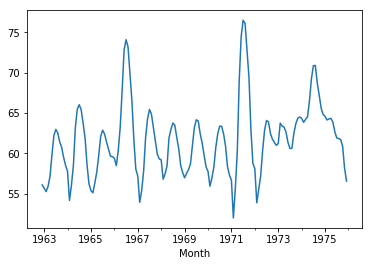

In [35]:
timeseries.rolling(12).std().plot(label='12 Month Rolling Std')

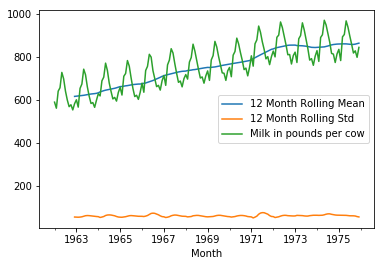

In [36]:
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')
timeseries.rolling(12).std().plot(label='12 Month Rolling Std')
timeseries.plot()
plt.legend()

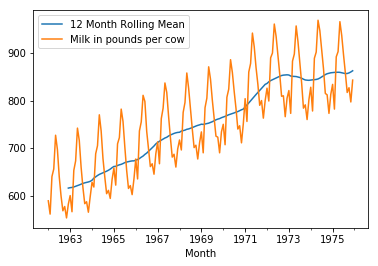

In [37]:
timeseries.rolling(12).mean().plot(label = '12 Month Rolling Mean')
timeseries.plot()
plt.legend()

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [39]:
decomposition = seasonal_decompose(df['Milk in pounds per cow'],freq = 12)  

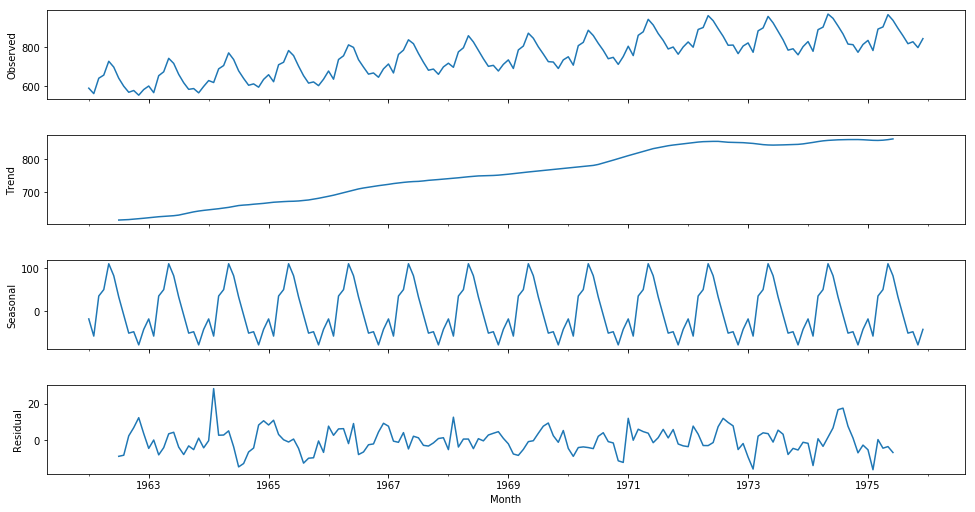

In [40]:
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)